In [1]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('Desktop/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# data cleaning

In [10]:
newdf = df.drop(['Name','Ticket','Cabin','SibSp','Parch','Embarked','Cabin'],axis='columns')
newdf.head()   

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le_sex = LabelEncoder()

In [54]:
target = newdf.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
inputs= newdf.drop(['Survived'], axis ='columns')
inputs.head()

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,3,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,3,male,35.0,8.0500


In [56]:
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])
inputs.head()

,PassengerId,Pclass,Sex,Age,Fare,sex_n
0,1,3,male,22.0,7.2500,1
1,2,1,female,38.0,71.2833,0
2,3,3,female,26.0,7.9250,0
3,4,1,female,35.0,53.1000,0
4,5,3,male,35.0,8.0500,1


In [69]:
final_inputs = inputs.drop(['Sex','PassengerId'], axis = 'columns')
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Pclass = inputs.Pclass.fillna(inputs.Pclass.mean())
inputs.Fare = inputs.Fare.fillna(inputs.Fare.mean())
final_inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


# training and testing split

In [94]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_inputs,target,train_size=0.80)

In [95]:
len(X_train)

712

In [96]:
len(X_test)

179

# fitting the model

In [97]:

from sklearn import tree
model = tree.DecisionTreeClassifier()


In [98]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction

In [99]:
model.score(X_test,y_test)

0.7821229050279329

In [100]:
y_predicted = model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[92, 18],
       [21, 48]], dtype=int64)

Text(33.0, 0.5, 'truth')

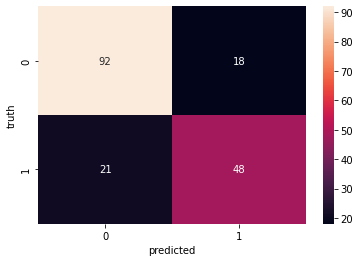

In [103]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')